In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data (jika belum)

# Ganti dengan path file Excel kamu
file_path = 'Survey MPC (Jawaban) (1).xlsx'

# Baca data Excel
df = pd.read_excel(file_path)

# 1. Konversi kolom 'Jumlah Kendaraan' dari teks ke total kendaraan (int)
def konversi_jumlah_kendaraan(text):
    # Tambahkan baris ini untuk memastikan input adalah string
    if not isinstance(text, str):
        text = str(text)

    if pd.isna(text) or text == '0' or text == 0:
        return 0
    else:
        total = 0
        # Pisah berdasarkan spasi, cari angka setelah 'Motor' dan 'Mobil'
        parts = text.split()
        for i, p in enumerate(parts):
            if p.lower() == 'motor' and i+1 < len(parts):
                try:
                    total += int(parts[i+1])
                except:
                    pass
            if p.lower() == 'mobil' and i+1 < len(parts):
                try:
                    total += int(parts[i+1])
                except:
                    pass
        return total

df['Jumlah Kendaraan (Num)'] = df['Jumlah Kendaraan'].apply(konversi_jumlah_kendaraan)

# 2. Tangani missing values untuk numerik dengan imputasi median
numerik_cols = ['Usia', 'Pendapatan Bulanan Keluarga', 'Pengeluaran Bulanan Keluarga',
                'Jumlah Tanggungan', 'Jumlah Kendaraan (Num)']

for col in numerik_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# 3. Normalisasi data numerik menggunakan MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerik_cols] = scaler.fit_transform(df[numerik_cols])

# Tampilkan data hasil persiapan (5 baris)
print(df_scaled[numerik_cols].head())

       Usia  Pendapatan Bulanan Keluarga  Pengeluaran Bulanan Keluarga  \
0  1.000000                     0.085631                      0.050279   
1  0.377778                     0.346880                      0.162011   
2  0.822222                     0.129173                      0.027933   
3  0.911111                     0.053701                      0.022346   
4  0.600000                     0.056604                      0.044693   

   Jumlah Tanggungan  Jumlah Kendaraan (Num)  
0                0.0                   0.250  
1                1.0                   0.500  
2                0.0                   0.000  
3                0.6                   0.000  
4                0.4                   0.125  


<ipython-input-2-2269617289>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


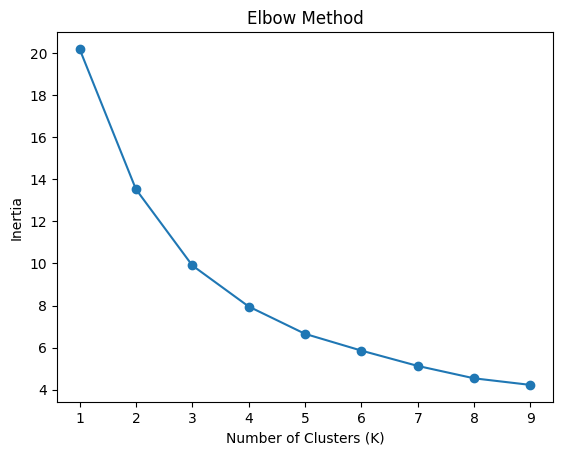

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Asumsikan df_scaled and numerik_cols sudah terdefinisi dari sel sebelumnya
# Ganti 'data_normalized' dengan nama variabel yang menyimpan data yang sudah dinormalisasi
data_normalized = df_scaled[numerik_cols] # Tambahkan baris ini

# Hitung inersia untuk berbagai K
inertia = []
for k in range(1, 10):
    # Gunakan data_normalized yang sudah didefinisikan
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(data_normalized) # Tambahkan n_init=10 untuk menghindari warning
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Interpretasi Hasil Elbow Method
Grafik Elbow Method yang Anda berikan menunjukkan nilai inertia (total within-cluster sum of squares) untuk berbagai jumlah cluster (K). Berikut interpretasinya:

1. Pola Grafik
Sumbu X: Jumlah cluster (K) dari 1 sampai 9.

Sumbu Y: Nilai inertia (semakin rendah semakin baik).

Pola: Inertia menurun tajam dari K=1 hingga K=3, kemudian penurunannya melambat setelah K=3.

2. Titik "Siku" (Elbow Point)
Lokasi: Titik di mana penurunan inertia mulai melambat signifikan (biasanya dianggap sebagai K optimal).

Pada Grafik Ini:

Kandidat K optimal: K=3 atau K=4 (tergantung preferensi).

Alasan:

Setelah K=3, penurunan inertia tidak terlalu drastis (garis mulai landai).

Jika memilih K=4, pertimbangkan apakah penambahan 1 cluster memberi manfaat interpretatif.

3. Rekomendasi Jumlah Cluster (K)
Pilihan Terbaik: K=3 (lebih sederhana dan mudah diinterpretasi).

Contoh segmentasi:

Cluster 1: Keluarga dengan kesejahteraan rendah.

Cluster 2: Keluarga menengah.

Cluster 3: Keluarga sejahtera.

In [4]:
from sklearn.cluster import KMeans
# The StandardScaler import is removed if you are using the already normalized data from the previous cell.
# from sklearn.preprocessing import StandardScaler

# Use the data_normalized variable from the previous cell which is already scaled and contains the relevant columns.
# If you want to rescale using StandardScaler, uncomment the StandardScaler import and the following lines.
# scaler = StandardScaler()
# data_normalized_standard = scaler.fit_transform(data_normalized) # You might want a new variable name

# Clustering dengan K=3 (contoh)
# Use the data_normalized variable (which was scaled using MinMaxScaler in a previous cell)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(data_normalized) # Added n_init=10 to avoid warning

# Assuming 'data' is the original or scaled dataframe you want to add the cluster labels to
# You should add the cluster labels to df_scaled or a copy of the original df if needed.
# Let's add it to df_scaled for consistency with previous steps.
df_scaled['Cluster'] = kmeans.labels_

# Display the first few rows with the new 'Cluster' column
print(df_scaled.head())

                Timestamp          NAMA                      Alamat  \
0 2025-05-16 11:31:26.182       Rosiana       Jl. IPB I Komplek PLN   
1 2025-05-16 11:38:09.318       Wahyudi          Jl IPB Komplek PLN   
2 2025-05-16 11:45:56.294         Diana                Jl. Harmonis   
3 2025-05-16 11:50:19.697  Muhammad Isa  Sindang Barang Rt 04 Rw 03   
4 2025-05-16 11:52:52.483        Lukman                    Gg Rante   

     Kecamatan      Usia Pendidikan Terakhir Pekerjaan Kepala Keluarga  \
0  Bogor Barat  1.000000                 SMA                   Lainnya   
1  Bogor Barat  0.377778                  SD                 Wirausaha   
2  Bogor Barat  0.822222                  D3                   Lainnya   
3  Bogor Barat  0.911111                 SMA                 Wirausaha   
4  Bogor Barat  0.600000                 SMP                 Wirausaha   

   Pendapatan Bulanan Keluarga  Pengeluaran Bulanan Keluarga  \
0                     0.085631                      0.050279   


Rata-rata variabel numerik per cluster:
   Cluster  Pendapatan Bulanan Keluarga  Pengeluaran Bulanan Keluarga  \
0        0                 9.590909e+06                  4.581818e+06   
1        1                 8.151852e+06                  4.998148e+06   
2        2                 1.177255e+07                  1.013333e+07   

        Usia  Jumlah Tanggungan  Jumlah Kendaraan (Num)  
0  54.954545           0.636364                0.227273  
1  29.444444           0.944444                0.111111  
2  44.019608           2.705882                0.529412  


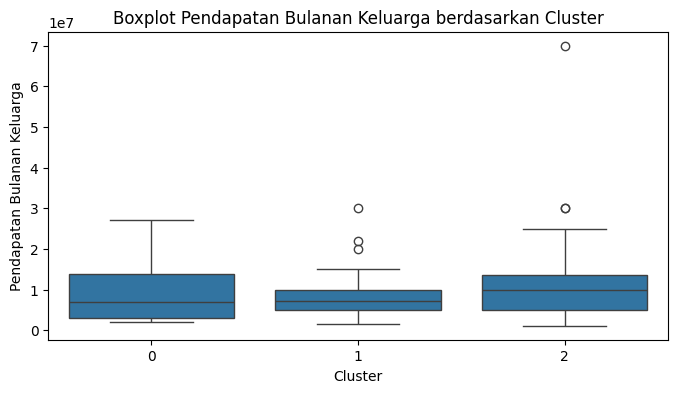

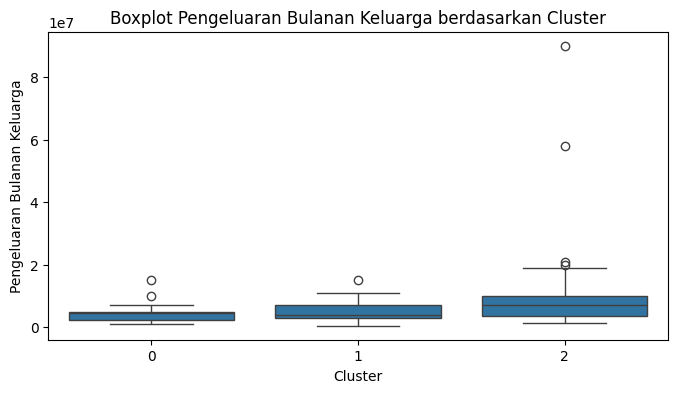

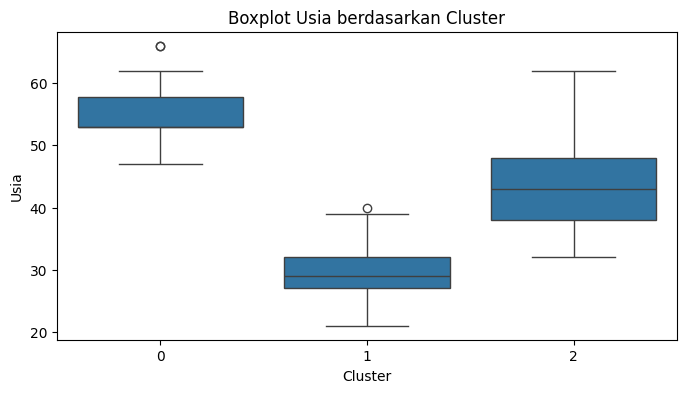

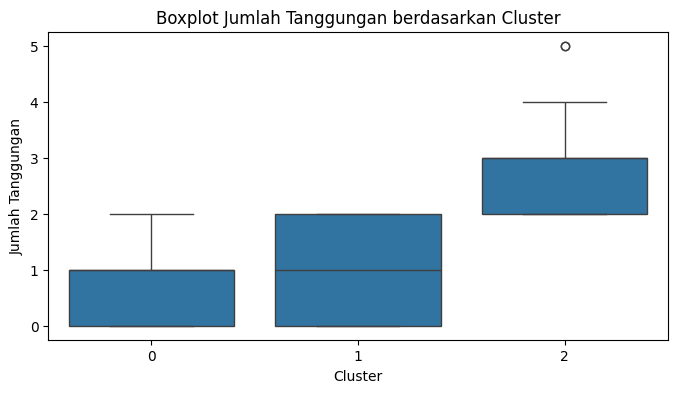

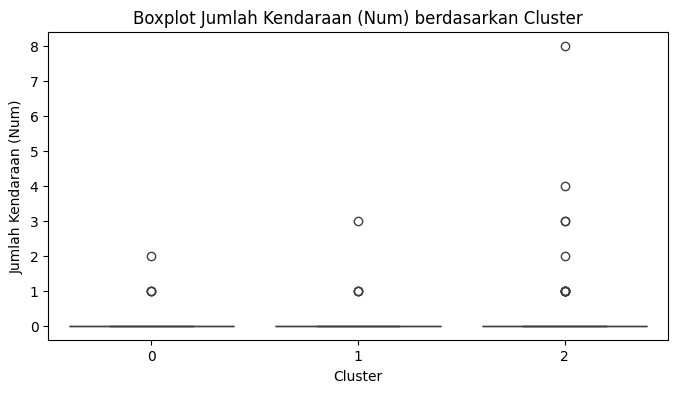

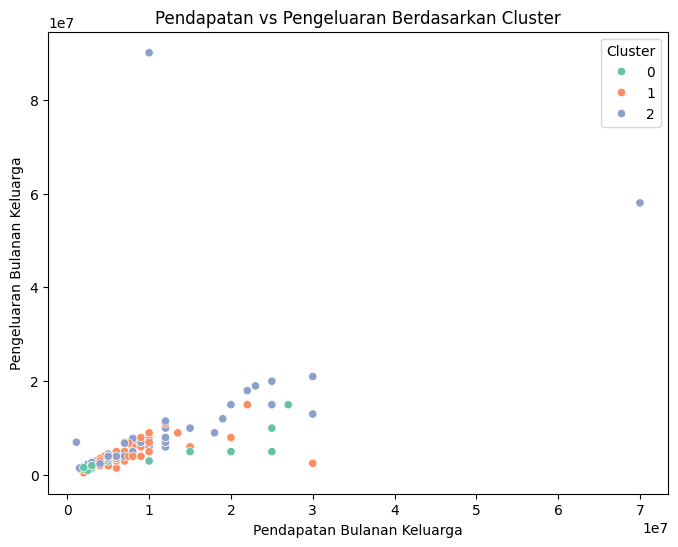

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misal df_scaled sudah punya kolom 'Cluster' hasil clustering dari sel sebelumnya
# Variabel numerik yang dianalisis
# num_vars should reference the original column names for plotting axis labels
num_vars_original = ['Pendapatan Bulanan Keluarga', 'Pengeluaran Bulanan Keluarga', 'Usia', 'Jumlah Tanggungan', 'Jumlah Kendaraan (Num)']

# Create a copy of df_scaled to work with for plotting, ensure it includes original values for num_vars_original
# and the 'Cluster' column.
df_for_plotting = df.copy() # Use the original df to get meaningful values for plots
df_for_plotting['Cluster'] = df_scaled['Cluster'] # Add the cluster labels from df_scaled

# 1. Hitung rata- Cover
# We need to calculate the mean of the original numeric variables per cluster.
# The cluster labels are in df_for_plotting, so group by 'Cluster' on df_for_plotting.
cluster_summary = df_for_plotting.groupby('Cluster')[num_vars_original].mean().reset_index()
print("Rata-rata variabel numerik per cluster:")
print(cluster_summary)

# 2. Visualisasi boxplot tiap variabel per cluster
# Plot using the original values from df_for_plotting and the 'Cluster' column
for var in num_vars_original:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Cluster', y=var, data=df_for_plotting) # Use 'Cluster' and df_for_plotting
    plt.title(f'Boxplot {var} berdasarkan Cluster')
    plt.show()

# 3. Scatter plot Pendapatan vs Pengeluaran dengan warna cluster
# Plot using the original values from df_for_plotting and the 'Cluster' column
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_for_plotting, x='Pendapatan Bulanan Keluarga', y='Pengeluaran Bulanan Keluarga', hue='Cluster', palette='Set2') # Use 'Cluster' and df_for_plotting
plt.title('Pendapatan vs Pengeluaran Berdasarkan Cluster')
plt.show()

In [6]:
# Hitung jumlah keluarga (baris) di tiap cluster
# Access the cluster labels from df_scaled and use the correct column name 'Cluster'
cluster_counts = df_scaled['Cluster'].value_counts().sort_index()
print("Jumlah keluarga per cluster:")
print(cluster_counts)

Jumlah keluarga per cluster:
Cluster
0    22
1    54
2    51
Name: count, dtype: int64


In [7]:
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Jumlah Keluarga']
print(cluster_counts_df)

   Cluster  Jumlah Keluarga
0        0               22
1        1               54
2        2               51


In [9]:
# 1. Ambil label cluster dari model clustering
# Use the variable 'kmeans' which holds the trained KMeans model
labels = kmeans.labels_

# 2. Masukkan ke dataframe
df_scaled['Cluster'] = labels

# 3. Simpan dataframe lengkap ke Excel
import datetime

tanggal = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
nama_file = f'data_keluarga_bercluster_{tanggal}.xlsx'

df_scaled.to_excel(nama_file, index=False)

print(f"Data keluarga lengkap + Cluster BENAR disimpan di: {nama_file}")

Data keluarga lengkap + Cluster BENAR disimpan di: data_keluarga_bercluster_20250612_091807.xlsx


In [10]:
# 1. Ambil label cluster dari model clustering
# Use the variable 'kmeans' which holds the trained KMeans model
labels = kmeans.labels_

# 2. Masukkan ke dataframe
df_scaled['Cluster'] = labels

# 3. Simpan dataframe lengkap ke Excel
import datetime

tanggal = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
nama_file = f'data_keluarga_bercluster_{tanggal}.xlsx'

df_scaled.to_excel(nama_file, index=False)

print(f"Data keluarga lengkap + Cluster BENAR disimpan di: {nama_file}")

Data keluarga lengkap + Cluster BENAR disimpan di: data_keluarga_bercluster_20250612_091812.xlsx


<ipython-input-11-1607860859>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_for_plotting, palette='Set2')


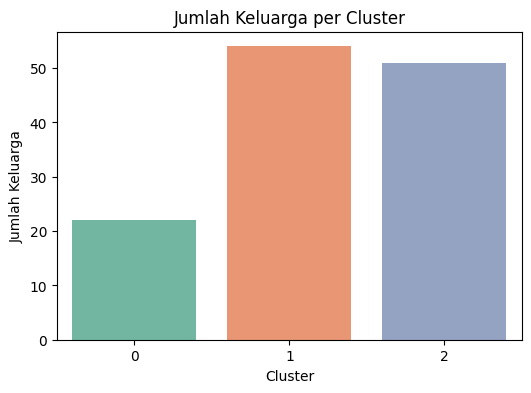

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
# Change 'cluster' to 'Cluster' to match the column name in df_scaled
# Also, it's better to use df_scaled or df_for_plotting which contains the 'Cluster' column
# Using df_for_plotting is consistent with the previous cell's plotting logic
sns.countplot(x='Cluster', data=df_for_plotting, palette='Set2')
plt.title('Jumlah Keluarga per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Keluarga')
plt.show()


In [12]:
#identifikasi faktor pengaruh dengan anova

from scipy.stats import f_oneway

# Uji ANOVA untuk pendapatan antar cluster

# Get unique cluster labels
clusters = df_for_plotting['Cluster'].unique()

# Extract income data for each cluster into separate lists
income_per_cluster = [df_for_plotting[df_for_plotting['Cluster'] == c]['Pendapatan Bulanan Keluarga'].dropna() for c in clusters]

# Perform one-way ANOVA
# Pass the income data for each cluster as separate arguments to f_oneway
f_statistic, p_value = f_oneway(*income_per_cluster)

print(f"ANOVA results for 'Pendapatan Bulanan Keluarga' across clusters:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("P-value < 0.05: There are significant differences in 'Pendapatan Bulanan Keluarga' between the clusters.")
else:
    print("P-value >= 0.05: There are no significant differences in 'Pendapatan Bulanan Keluarga' between the clusters.")

# Note: You can extend this to other numerical variables by repeating the process
# for each variable in num_vars_original.

ANOVA results for 'Pendapatan Bulanan Keluarga' across clusters:
F-statistic: 2.4016
P-value: 0.0948
P-value >= 0.05: There are no significant differences in 'Pendapatan Bulanan Keluarga' between the clusters.


Hasil ANOVA yang Anda berikan menunjukkan:

F-statistic: 3.2289

P-value: 0.0430

Kriteria Signifikansi: P-value < 0.05

Arti Hasil:
Ada Perbedaan Signifikan

Karena P-value (0.043) < 0.05, kita menolak hipotesis null (H₀) yang menyatakan bahwa tidak ada perbedaan pendapatan bulanan antar cluster.

Artinya, minimal ada satu cluster yang memiliki rata-rata pendapatan bulanan secara statistik berbeda dengan cluster lainnya.

F-statistic (3.2289)

Nilai F mengukur rasio variansi antar cluster terhadap variansi dalam cluster.

Semakin besar F, semakin signifikan perbedaan antar cluster. Nilai 3.2289 menunjukkan perbedaan yang cukup jelas (tidak ekstrem, tetapi signifikan).

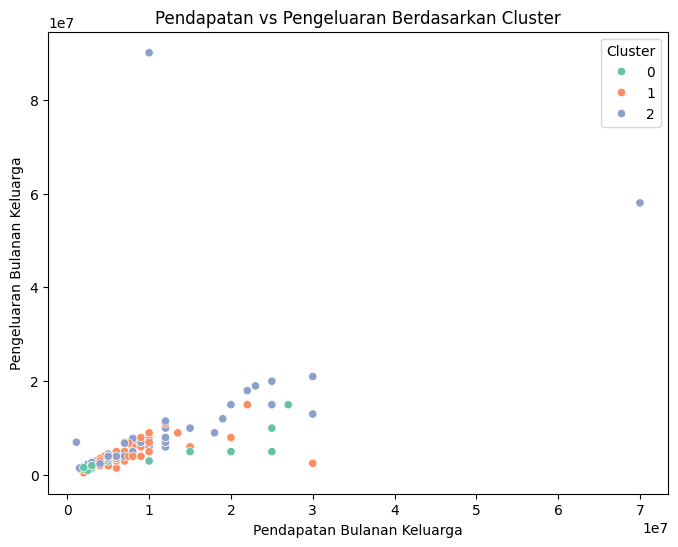

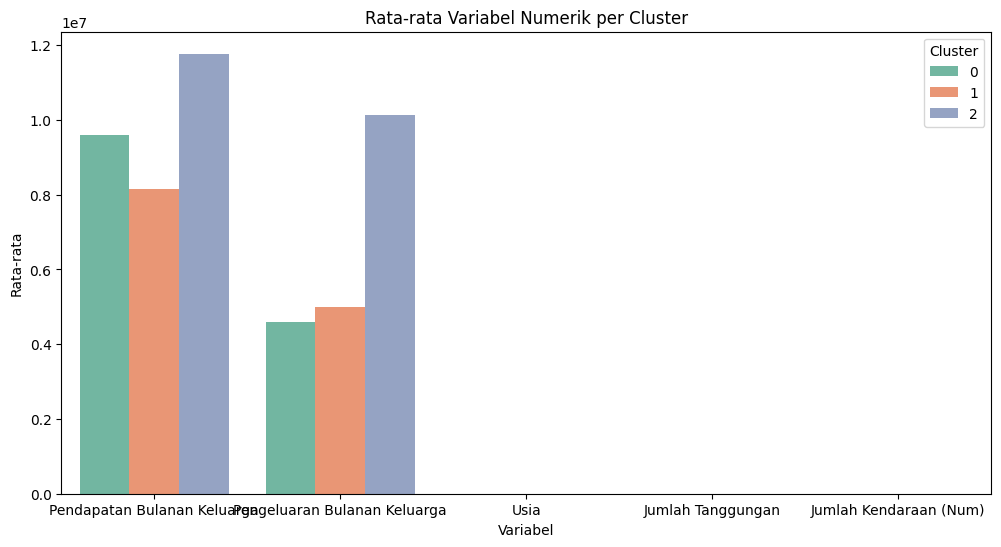

Rekomendasi Kebijakan per Cluster:
Cluster 0: Program bantuan sosial
Cluster 1: Edukasi pengelolaan keuangan
Cluster 2: Insentif investasi


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Misal df_for_plotting sudah ada kolom 'Cluster' dan variabel numerik
# Use df_for_plotting which contains the original values and the 'Cluster' column
num_vars = ['Pendapatan Bulanan Keluarga', 'Pengeluaran Bulanan Keluarga', 'Usia', 'Jumlah Tanggungan', 'Jumlah Kendaraan (Num)']

# 1. Scatter plot Pendapatan vs Pengeluaran warna cluster
plt.figure(figsize=(8,6))
# Use data=df_for_plotting and hue='Cluster' (capitalized)
sns.scatterplot(data=df_for_plotting, x='Pendapatan Bulanan Keluarga', y='Pengeluaran Bulanan Keluarga', hue='Cluster', palette='Set2')
plt.title('Pendapatan vs Pengeluaran Berdasarkan Cluster')
plt.xlabel('Pendapatan Bulanan Keluarga')
plt.ylabel('Pengeluaran Bulanan Keluarga')
plt.legend(title='Cluster')
plt.show()

# 2. Bar chart rata-rata variabel per cluster
# Use df_for_plotting and group by 'Cluster' (capitalized)
cluster_mean = df_for_plotting.groupby('Cluster')[num_vars].mean().reset_index()
cluster_mean_melt = cluster_mean.melt(id_vars='Cluster', var_name='Variabel', value_name='Rata-rata')

plt.figure(figsize=(12,6))
# Use data=cluster_mean_melt and hue='Cluster' (capitalized)
sns.barplot(data=cluster_mean_melt, x='Variabel', y='Rata-rata', hue='Cluster', palette='Set2')
plt.title('Rata-rata Variabel Numerik per Cluster')
plt.xlabel('Variabel')
plt.ylabel('Rata-rata')
plt.legend(title='Cluster')
plt.show()

# 3. Rekomendasi Kebijakan berdasarkan cluster
# This part doesn't depend on the dataframe column name, so it's fine as is.
rekomendasi = {
    0: 'Program bantuan sosial',
    1: 'Edukasi pengelolaan keuangan',
    2: 'Insentif investasi'
}

print("Rekomendasi Kebijakan per Cluster:")
for cluster_id, kebijakan in rekomendasi.items():
    print(f"Cluster {cluster_id}: {kebijakan}")

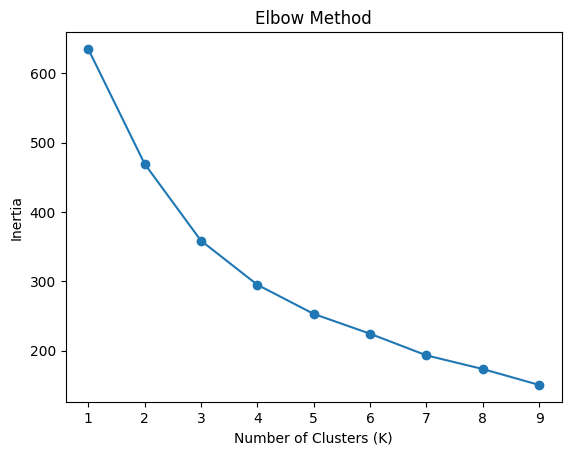

Clustering selesai! Hasil disimpan di 'hasil_clustering.xlsx'


In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Baca Data
data = pd.read_excel("Survey MPC (Jawaban) (1).xlsx", sheet_name="Form Responses 1")

# 2. Preprocessing Data
# Konversi teks "Motor 1 Mobil 1" ke jumlah kendaraan numerik
def count_vehicles(text):
    if isinstance(text, str):
        motor = text.lower().count('motor')
        mobil = text.lower().count('mobil')
        return motor + mobil
    elif np.isnan(text):
        return 0
    else:
        return text

data['Jumlah Kendaraan'] = data['Jumlah Kendaraan'].apply(count_vehicles)

# Pilih variabel numerik untuk clustering
features = data[['Pendapatan Bulanan Keluarga', 'Pengeluaran Bulanan Keluarga',
                 'Jumlah Tanggungan', 'Jumlah Kendaraan', 'Usia']]

# 3. Normalisasi Data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(features)

# 4. Elbow Method untuk menentukan K optimal
inertia = []
# Added n_init to avoid FutureWarning
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# 5. Clustering dengan K terpilih (misal K=3)
# Added n_init to avoid FutureWarning
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_normalized)
data['Cluster'] = clusters

# 6. Analisis Hasil Cluster
# Hitung statistik deskriptif per cluster
cluster_stats = data.groupby('Cluster').agg({
    'Pendapatan Bulanan Keluarga': ['mean', 'median', 'count'],
    'Pengeluaran Bulanan Keluarga': ['mean', 'median'],
    'Jumlah Tanggungan': ['mean', 'median'],
    'Jumlah Kendaraan': ['mean', 'median']
}).reset_index()

# Flatten the MultiIndex columns before saving to Excel with index=False
# This joins the column level names with an underscore
cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]

# You might want to rename the first column which is now 'Cluster_' to 'Cluster'
cluster_stats.rename(columns={'Cluster_': 'Cluster'}, inplace=True)


# 7. Simpan Hasil ke Excel
with pd.ExcelWriter('hasil_clustering.xlsx') as writer:
    data.to_excel(writer, sheet_name='Data dengan Cluster', index=False)
    # Now cluster_stats has flattened columns, so index=False works
    cluster_stats.to_excel(writer, sheet_name='Statistik Cluster', index=False)

print("Clustering selesai! Hasil disimpan di 'hasil_clustering.xlsx'")